# Einführung Data Science - Praktikum 04 - Chess


## Bibliotheken importieren

In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

## Data laden
**Diesmal nicht so einfach --> Parsing nötig!**

Die Daten stammen von der Fédération Internationale des Échecs (FIDE, französisch für Internationaler Schachverband): https://ratings.fide.com/download.phtml

Hier wollen wir mit dem Datensatz "**Standard ratings**" arbeiten. Die Hausaufgabe dazu war, diese Daten (in Form einer .XML-Datei) zu importieren.
Dies geht nicht direkt mit Pandas, sondern die Daten müssen erst eingelesen und in ein Python Dictionary (oder eine Liste) umgewandelt werden. Infos zu dem Schach-Rating, der sogenannten ELO-Zahl: https://de.wikipedia.org/wiki/Elo-Zahl.

Wird die Datei in einem Editor geöffnet, schaut sie so aus:
```
<playerslist>
<player>
<fideid>25121731</fideid>
<name>A C J John</name>
<country>IND</country>
<sex>M</sex>
<title></title>
<w_title></w_title>
<o_title></o_title>
<foa_title></foa_title>
<rating>1063</rating>
<games>0</games>
<k>40</k>
<birthday>1987</birthday>
<flag>i</flag>
</player>
<player>
<fideid>35077023</fideid>
…
```

## Parser schreiben
Es gibt mehrere Möglichkeiten einen sogennanten "Parser" zu schreiben um die Datein einzulesen.

XML-Dateien können auch verschiedene Arten importiert werden. Grundlegend kann entweder (1) ein völlig eigenständiger Parser geschrieben werden, der Zeile für Zeile die Datei einliest und interpretiert. Das ist aber recht aufwendig. Einfach ist es oft, existierende Python-Bibliotheken zu nutzen, z.B. `xml` oder `xmltodict`.

Andere Quellen:

- https://www.geeksforgeeks.org/xml-parsing-python/
- https://www.w3schools.com/xml/xml_parser.asp
- https://www.delftstack.com/de/howto/python/python-xml-parser/


## Lösung mit `xmltodict`

In [3]:
import xmltodict

# wenn im selben Ordner
file_xml = os.path.join(os.getcwd(), "dataset", "standard_rating_list.xml")
with open(file_xml) as file:
    doc = xmltodict.parse(file.read())

### Umwandeln in Pandas DataFrame
Mit xmltodoc wird der Inhalt in ein verschachteltes Dictionary umgewandelt.

In [4]:
type(doc["playerslist"]["player"])

list

In [5]:
doc["playerslist"]["player"][:2]

[{'fideid': '25121731',
  'name': 'A C J John',
  'country': 'IND',
  'sex': 'M',
  'title': None,
  'w_title': None,
  'o_title': None,
  'foa_title': None,
  'rating': '1063',
  'games': '0',
  'k': '40',
  'birthday': '1987',
  'flag': 'i'},
 {'fideid': '35077023',
  'name': 'A Chakravarthy',
  'country': 'IND',
  'sex': 'M',
  'title': None,
  'w_title': None,
  'o_title': None,
  'foa_title': None,
  'rating': '1151',
  'games': '0',
  'k': '40',
  'birthday': '1986',
  'flag': 'i'}]

In [25]:
data = pd.DataFrame(doc["playerslist"]["player"])
data.head()

,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,birthday,flag
0,25121731,A C J John,IND,M,None,None,None,None,1063,0,40,1987,i
1,35077023,A Chakravarthy,IND,M,None,None,None,None,1151,0,40,1986,i
2,10207538,"A E M, Doshtagir",BAN,M,None,None,None,None,1840,0,40,1974,i
3,10680810,"A hamed Ashraf, Abdallah",EGY,M,None,None,None,None,1728,0,40,2001,i
4,5716365,"A Hamid, Harman",MAS,M,None,None,None,None,1325,0,40,1970,i


In [12]:
data.dropna().shape # zu großer Datenverlust

(1, 13)

# (1) Erste Datenerkundung
- Wie viele und welche Spalten gibt es? --> `data.columns`
- Gibt es fehlende Werte? --> `.info()`
- erster Überblick und: Gibt es merkwürdige Einträge --> `.describe()`

### Ausfüllen:
- Anzahl der Spalten: ...
- Gibt es fehlende Werte und wenn ja, welche? ...

In [13]:
data.columns

Index(['fideid', 'name', 'country', 'sex', 'title', 'w_title', 'o_title',
       'foa_title', 'rating', 'games', 'k', 'birthday', 'flag'],
      dtype='object')

In [14]:
data.head()

,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,birthday,flag
0,25121731,A C J John,IND,M,None,None,None,None,1063,0,40,1987,i
1,35077023,A Chakravarthy,IND,M,None,None,None,None,1151,0,40,1986,i
2,10207538,"A E M, Doshtagir",BAN,M,None,None,None,None,1840,0,40,1974,i
3,10680810,"A hamed Ashraf, Abdallah",EGY,M,None,None,None,None,1728,0,40,2001,i
4,5716365,"A Hamid, Harman",MAS,M,None,None,None,None,1325,0,40,1970,i


In [15]:
data.describe()

,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,birthday,flag
count,413948,413948,413948,413948,20539,4071,1582,2709,413948,413948,413948,405475,269155
unique,413948,407224,199,2,9,5,33,4,1707,31,4,100,3
top,25121731,"Mueller, Michael",RUS,M,FM,WFM,FI,AFM,1695,0,40,2005,i
freq,1,10,38650,369678,8707,1876,426,932,447,352437,230319,13034,224885


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413948 entries, 0 to 413947
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   fideid     413948 non-null  object
 1   name       413948 non-null  object
 2   country    413948 non-null  object
 3   sex        413948 non-null  object
 4   title      20539 non-null   object
 5   w_title    4071 non-null    object
 6   o_title    1582 non-null    object
 7   foa_title  2709 non-null    object
 8   rating     413948 non-null  object
 9   games      413948 non-null  object
 10  k          413948 non-null  object
 11  birthday   405475 non-null  object
 12  flag       269155 non-null  object
dtypes: object(13)
memory usage: 41.1+ MB


# (2) Data cleaning

Die Daten können nun für unsere Zwecke etwas vereinfacht werden, indem wir nur die für uns relevanten Feature/Variablen behalten.

Cleanen Sie das DataFrame, indem Sie nur die Spalten `"name", "country", "sex", "rating", "birthday"` behalten.

In [26]:
keep_columns = ["name", "country", "sex", "rating", "birthday"]
clean_data = data[keep_columns]

Einträge mit fehlenden Werten entfernen (`.dropna()`)

In [31]:
clean_data = clean_data.dropna()
print("Data points lost: ", data.shape[0] - clean_data.shape[0])

Data points lost:  8473


Wo nötig Strings in Zahlen umwandeln, z.B. mit `data.xyz = data.xyz.astype(int)`.

In [38]:
clean_data.rating = clean_data.rating.astype(int)
clean_data.birthday = clean_data.birthday.astype(int)

Die aufgereinigten Daten noch einmal anschauen mit `.head()`, `.info()` sowie `.describe()`. **TIPP**: Um alle Spalten anzuzeigen können wir am besten `.describe(include="all")` ausführen!

In [23]:
clean_data.head()

,name,country,sex,rating,birthday
0,A C J John,IND,M,1063,1987
1,A Chakravarthy,IND,M,1151,1986
2,"A E M, Doshtagir",BAN,M,1840,1974
3,"A hamed Ashraf, Abdallah",EGY,M,1728,2001
4,"A Hamid, Harman",MAS,M,1325,1970


In [ ]:
clean_data.describe(include="all")

In [ ]:
clean_data.info()

Wie viele verschiedene Länder sind im Datensatz enthalten? (Antwort: ...)

In [36]:
len(clean_data.country.value_counts())

198

In welchem Zahlbereich (range/Spannweite) liegen die Werte für `rating`? (Antwort: ...)

In [ ]:
# your code here

Wie alt ist der/die älteste Spieler\*In? (Antwort: ...)

In [ ]:
# your code here

Wie alt ist der/die jüngste Spieler\*In? (Antwort: ...)

In [ ]:
# your code here

---
# (3) Analysen


## Pandas Wiederholung:

### Kategorialer Variablen anschauen
Mit Pandas können wir uns sehr schnell und einfach anschauen welche Kategorien wie oft vorkommen, nämlich mit `.value_counts("hier_name_der_spalte")`.

### Grafisches Darstellen:
Mit Pandas können wir Ergebnisse oft sehr schnell grafisch darstellen, z.B. über `.plot(kind="hist")`. Hierbei können wir aus vielen Typen wählen, etwa `hist`, `pie`, `scatter`, `bar`, `barh`.

### Sortieren
Um die Tabelle nach Werten zu sortieren nutzen wir `.sort_values("name_der_spalte")`. Dies sortiert die Tabelle nach der gewünschten Spalte, allerdings in aufsteigender Richtung. Für die umgekehrte Sortierung nehmen wir `.sort_values("name_der_spalte", ascending=False)`.

### Auswählen von Daten mittels Maske:
Wir können einen Teil der Daten mit einer Maske auswählen, nach dem Muster

```python
mask = (data[spalten_name_hier] == ... )  # <, >, ==, >=,...
data[mask]
```

Mehrere Masken können angewendet werden durch z.B.

```python
mask1 = (data[spalten_name_hier] == ... )  # <, >, ==, >=,...
mask2 = (data[spalten_name_hier] > ... )  
data[mask1 & mask2]
```

## (3.1) Gender-gap und beste Spieler\*Innen analysieren

Wie viele männliche und weibliche Spieler\*Innen sind im Datensatz enthalten?

In [37]:
clean_data.sex.value_counts() #.plot(kind="pie")

sex
M    361832
F     43643
Name: count, dtype: int64

---
Wie ist die Prozentuale Verteilung (männlich vs. weiblich)?

In [ ]:
f_vs_m = # your code here
ratio = # your code here
f"Anteil Frauen: {(ratio*100):.2f} %."

---
Erstellen Sie einen Pie-Plot zu dieser Verteilung.

In [1]:
# your code here

---
Wie sind die Geburtsjahrgänge bei Männern und Frauen verteilt? Gibt es hier deutliche Unterschiede oder eher nicht?

Erstellen Sie jeweils ein Histogramm für Frauen und für Männer. 

<Axes: ylabel='Frequency'>

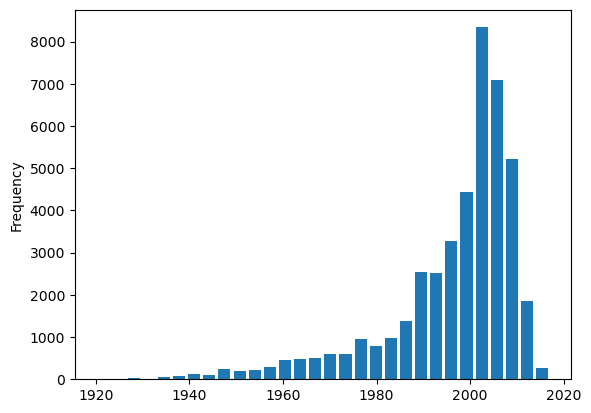

In [43]:
mask_f = clean_data.sex == "F"
clean_data[mask_f]["birthday"].plot(kind="hist", bins=30, rwidth=0.8)

<Axes: ylabel='Frequency'>

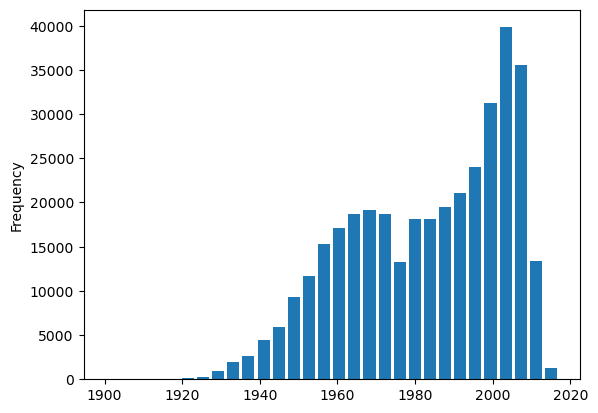

In [45]:
mask_m = clean_data.sex == "M"
clean_data[mask_m]["birthday"].plot(kind="hist", bins=30, rwidth=0.8)

Vergleichbarkeit verbessern: Normieren auf Wert 1 und mit Transparenz überlappen.

In [ ]:
# Create masks for each gender
mask_f = # your code here
mask_m = # your code here

# Calculate weights for each gender
male_weights =# your code here
female_weights = # your code here

# Plot the histograms
ax = data[mask_m]['birthday'].plot(kind='hist', bins=30, rwidth=0.8, alpha=0.5, label='Male', weights=male_weights)
data[mask_f]['birthday'].plot(kind='hist', bins=30, rwidth=0.8, alpha=0.5, label='Female', ax=ax, weights=female_weights)

# Customize the plot
ax.legend()
ax.set_xlabel('Birthday')
ax.set_ylabel('Proportion')

Schauen Sie sich erneut die prozentuale Verteilung weiblich vs. männlich an. Diesmal jedoch nur für Personen die nach 1999 geboren sind.

In [58]:
mask_birthday_2000 = clean_data.birthday > 1999

f_vs_m = clean_data[mask_birthday_2000].sex.value_counts()
f_vs_m["F"] / f_vs_m["M"]

0.22853535353535354

Was sind die 10, 20, 50, oder 100 besten Spieler\*Innen?

In [ ]:
# your code here

Wie sieht die Verteilung Männer vs. Frauen aus in den Top100?

In [ ]:
# Männer/Frauen in Top100
top100 = # your code here
top100.value_counts("sex")

## (3.2) ELO-Verteilungen analysieren

- Wiederholen sie die Aufgabe aber fügen sie diesmal auch noch eine weitere Auswahlmaske hinzu um die Geburtsjahrgänge einzuschränken. Probieren sie z.B. `< 2002` oder `< 1992`.

Stellen sie die Verteilungen der ELO-Ratings dar für drei Fälle: (1) Alle Spieler\*Innen, (2) männliche Spieler, (3) weibliche Spielerinnen.  

(1) Alle Spieler\*Innen

In [ ]:
# your code here

(2) männliche Spieler und (3) weibliche Spielerinnen.

In [ ]:
mask_f = # your code here
mask_m = # your code here
mask_birthday = # your code here

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
data[mask_m & mask_birthday]["rating"].plot(kind="hist", bins=40, rwidth=0.8,
                                    ax=ax1)
data[mask_f & mask_birthday]["rating"].plot(kind="hist", bins=40, rwidth=0.8,
                                    ax=ax2)

Nochmal normieren und überlappen:

In [ ]:
mask_birthday = # your code here
data_m = # your code here
data_f = # your code here


bins = 30

weights_m = np.ones_like(data_m["rating"]) / len(data_m)
weights_f = np.ones_like(data_f["rating"]) / len(data_f)

plt.hist(data_m["rating"], bins=bins, rwidth=0.8, alpha=0.5, label='Male', weights=weights_m)
plt.hist(data_f["rating"], bins=bins, rwidth=0.8, alpha=0.5, label='Female', weights=weights_f)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating distribution')
plt.legend(loc='upper right')

**Nächster Schritt:** Ein Land herausgreifen.

## Welches Land untersuchen?
Wir können schauen in welchen Ländern viele weibliche Spielerinnen registriert sind, indem wir die Daten vorfiltern (nur Frauen) und dann mit `.value_counts("country")` nach Ländern zählen.

In [ ]:
mask_f = # your code here
data_female_per_country = # your code here
# sortiert
# your code here

Für ein besseres Bild auch für die Männer betrachten.

In [ ]:
mask_m = # your code here
data_male_per_country = # your code here
# sortiert
# your code here

Nun schauen wir nach Ländern mit einer repräsentativen Anzahl an Frauen. Wir filtern weiter und schauen in welchem Land mindestens 500 Spielerinnen registriert sind.

In [ ]:
mask_f_count_500 = # your code here
# gefilterte Daten ausgeben
# your code here

Es ist jedoch nicht nur eine Mindestanzahl ausschlaggebend. Wir suchen darüberhinaus ein möglichst ausgeglichenes Verhältnis von Frauen zu Männern. Wir erstellen eine Liste mit allen Ländern, indem wir uns von `data_female_per_country` den Index ausgeben lassen: 

In [ ]:
countries_with_500_females = data_female_per_country[mask_f_count_500].index
countries_with_500_females

Statt einer Maske zu nutzen, können wir auch die `.isin()` - Methode benutzen, welcher wir unsere Länderliste `countries_with_500_females` übergeben können. Dies können wir nun auf `data_male` anwenden.

In [ ]:
data_male = data[mask_m]

mask_filtered_data_m = # your code here
filtered_data_m = # your code here
data_male_per_country = # your code here

In [ ]:
print(data_male_per_country)

In [ ]:
print(data_female_per_country)

Möchte man von einem Pandas `Series`-Objekt den Index und die Werte auslesen, kann man die Methode `.iteritems()` benutzen. Zur Demonstartion nutzen wir diese in einer For-Schleife zur besseren Veranschaulichung (in der Konsole) der bisher gefilterten Daten. Aufhübschungs mit f-Strings und einer "gebastelten" Tabelle:

In [ ]:
print(f"{'Country':^10}|{'Male':^10}|{'Female':^10}")
print("-" * 32)

for idx, value in data_male_per_country.iteritems():
    female_value = data_female_per_country.loc[idx]
    print(f"{idx:^10}|{value:^10}|{female_value:^10}")

Nun berechnen wir noch die prozentuale Frauenanteile pro Land.

In [ ]:
ratios = # your code here
print(ratios.sort_values(ascending=False))

Wir fügen die Verhältnisse der Tabelle hinzu.

In [ ]:
print(f"{'Country':^10}|{'Male':^10}|{'Female':^10}|{'Ratio':^10}")
print("-" * 43)

for idx, value in data_male_per_country.iteritems():
    female_value = data_female_per_country.loc[idx]
    ratio = f"{ratios.loc[idx] * 100:.2f} %"
    print(f"{idx:^10}|{value:^10}|{female_value:^10}|{ratio:^10}")

Schauen wir uns ELO-Rating Verteilungen für Frauen in potentiell "gut zu untersuchenden" Ländern an nach den Kriterien "möglichst viele Personen und möglichst ausgeglichenes Verhältnis".

Hierfür wollen wir uns wieder zwei überlappte Barplots ansehen mit normierten ELO-Ratings.

In [ ]:
mask_birthday = # your code here
mask_country = # your code here
data_m = # your code here
data_f = # your code here

weights_m = np.ones_like(data_m["rating"]) / len(data_m)
weights_f = np.ones_like(data_f["rating"]) / len(data_f)

bins = 30

data_m["rating"].plot(kind="hist", bins=bins, rwidth=0.8, alpha=0.5, label='Male', weights=weights_m, legend=True)
data_f["rating"].plot(kind="hist", bins=bins, rwidth=0.8, alpha=0.5, label='Female', weights=weights_f, legend=True)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating distribution')
plt.legend(loc='upper right')

### BEISPIEL - Alternative Möglichkeit des Plots für Männer/Frauen aus Indien (Geburtsjahrgänge < 2002)

In [ ]:
mask_year = # your code here
mask_country = # your code here


a, b = np.histogram(# your code here)
c, d = np.histogram(# your code here)

fig, ax = plt.subplots(figsize=(10, 6))
delta_bin_F = b[1] - b[0]
delta_bin_M = d[1] - d[0]

ax.plot(b[1:] - delta_bin_F/2, a/np.sum(a), ".--", label="Frauen")
ax.plot(d[1:] - delta_bin_M/2, c/np.sum(c), ".--", label="Männer")

ax.set_xlabel("ELO rating")
ax.set_ylabel("Fraction")
plt.legend()
plt.title("Compare chess players form India, born before 2000")